In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from mpl_toolkits.basemap import Basemap
import glob
import os
import shutil
import re
import cartopy
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
#
%matplotlib inline
# %matplotlib notebook
#
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap, BoundaryNorm
#
# PD=os.getcwd(); PD


### <font color=black> IMPORT:: <font color=blue> **ALL PERCENTILE** </font> </font>

In [2]:
wf='wf_1e'
ssp='ssp585'

# folder='full_sample_workflows'
# pathG='/projects/kopp/ggg46/nz_projections/regional/{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)
# pathP='/scratch/pk695/FACTS/nzOG-pk695/local-pk695/001_{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)

folder='dist_workflows'
pathG='/projects/kopp/ggg46/nz_projections/regional/{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)
pathP='/scratch/pk695/FACTS/nzOG-pk695/local-pk695/002_{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)

fileG='total-workflow.nc'
fileP='nzOG.{arg0}.total.workflow.wf{arg1}.local.nc'.format(arg0=ssp,arg1=wf.split('_')[1])
var='sea_level_change'

# labels
EXP_G=pathG.split('/')[3].split('_')[0]; 
EXP_P=pathP.split('/')[4].split('-')[1]; 
EXP_file=fileP; 

d_ncG, d_ncP = [xr.open_dataset(os.path.join(path, file)) for path, file in [(pathG, fileG), (pathP, fileP)]]

yrST=2020; yrEN=2100; yr=np.arange(yrST, yrEN+1, 10)
yrIDX_G, yrIDX_P=[np.searchsorted(d['years'].values, yr) for d in [d_ncG, d_ncP]]


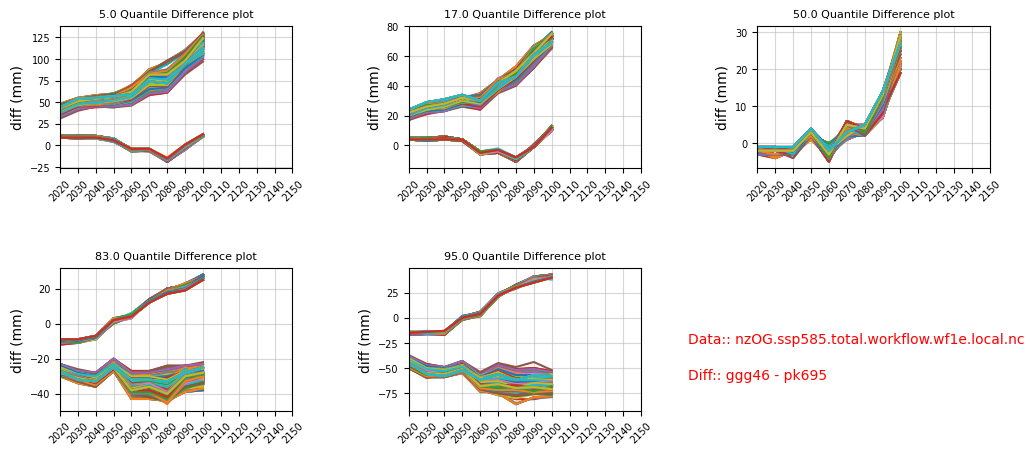

In [3]:
ptile=[5,17,50,83,95]
ptileIDX_G, ptileIDX_P=[np.searchsorted(d['quantiles'].values*100, ptile) for d in [d_ncG, d_ncP]]

loc=np.arange(0,700) #Location:: choose from 0 to 7434           
# loc=200
latP, lonP = [d_ncP[d][loc].values for d in ['lat', 'lon']]


slcG=d_ncG[var][ptileIDX_G, yrIDX_G, loc]
slcP=d_ncP[var][ptileIDX_P, yrIDX_P, loc]
slcG_reshaped = slcG.values.reshape(-1)
slcP_reshaped = slcP.values.reshape(-1)
diff = slcG_reshaped - slcP_reshaped
diff = np.reshape(diff, slcG.shape)


xx=d_ncG['years'][yrIDX_G].values

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 5))

for i, pp in enumerate(ptileIDX_G):
    
    row, col = divmod(i, 3)
    ax = axs[row, col]
    
    for ii,ll in enumerate(loc):
        yy1=diff[i,:,ii]
#         ax.plot(xx, yy1, label='Diff')
        ax.plot(xx, yy1)
    
    ax.set_xlim(2020, 2150); ax.set_xticks(range(2020, 2160, 10))
    ax.tick_params(axis='x', labelrotation=45,labelsize=7)
    ax.tick_params(axis='y', labelsize=7)
    ax.grid(alpha=0.5)
    ax.set_ylabel('diff (mm)'); #ax.set_xlabel('Years')
    
#     LAT=str(np.round(latP,2)); LON=str(np.round(lonP,2))
    QUANT=str(d_ncP['quantiles'][pp].values*100)
    ax.set_title(QUANT+' Quantile Difference plot' ,fontsize=8)
#     ax.set_title(QUANT+' Quantile Difference plot for \n'+'Location:: '+LAT+' and '+LON,fontsize=8)
#     ax.legend(fontsize=6)

ax.text(1.2, .5, 'Data:: '+EXP_file, fontsize=10, color='red', transform=ax.transAxes, ha='left', va='center')
ax.text(1.2, .25, 'Diff:: '+EXP_G+' - '+ EXP_P, fontsize=10, color='red', transform=ax.transAxes, ha='left', va='center')
axs[1, 2].remove()

plt.subplots_adjust(wspace=0.5, hspace=0.7)
plt.show()

### 
### ==>
### <font color=black> PLOT:: <font color=blue> **ALL WF & 3Percentile** </font> </font>

In [ ]:
# wf='wf_1e'
WF=['wf_1e','wf_1f','wf_2e','wf_2f','wf_3e','wf_3f','wf_4']
ssp='ssp126'

fig, axs = plt.subplots(nrows=7, ncols=3, figsize=(12*2, 5*6))

for i, wf in enumerate(WF):
    folder='dist_workflows'
    pathG='/projects/kopp/ggg46/nz_projections/regional/{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)
    pathP='/scratch/pk695/FACTS/nzOG-pk695/local-pk695/002_{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)

    fileG='total-workflow.nc'
    fileP='nzOG.{arg0}.total.workflow.wf{arg1}.local.nc'.format(arg0=ssp,arg1=wf.split('_')[1])
    var='sea_level_change'

    # labels
    EXP_G=pathG.split('/')[3].split('_')[0]; 
    EXP_P=pathP.split('/')[4].split('-')[1]; 
    EXP_file=fileP; 

    d_ncG, d_ncP = [xr.open_dataset(os.path.join(path, file)) for path, file in [(pathG, fileG), (pathP, fileP)]]

    yrST=2020; yrEN=2100; yr=np.arange(yrST, yrEN+1, 10)
    yrIDX_G, yrIDX_P=[np.searchsorted(d['years'].values, yr) for d in [d_ncG, d_ncP]]

    ptile=[17,50,83]
    ptileIDX_G, ptileIDX_P=[np.searchsorted(d['quantiles'].values*100, ptile) for d in [d_ncG, d_ncP]]

    loc=np.arange(0,7434) #Location:: choose from 0 to 7434
#     loc=np.arange(0,7) #Location:: choose from 0 to 7434           
    latP, lonP = [d_ncP[d][loc].values for d in ['lat', 'lon']]

    slcG=d_ncG[var][ptileIDX_G, yrIDX_G, loc]
    slcP=d_ncP[var][ptileIDX_P, yrIDX_P, loc]
    slcG_reshaped = slcG.values.reshape(-1)
    slcP_reshaped = slcP.values.reshape(-1)
    diff = slcG_reshaped - slcP_reshaped
    diff = np.reshape(diff, slcG.shape)

    xx=d_ncG['years'][yrIDX_G].values

    for pt0,pt1 in enumerate(ptile):
        row, col = i, pt0
        ax = axs[row, col]
        
        for lo0,lo1 in enumerate(loc):
            yy1=np.squeeze(diff[pt0,:,lo0])
            ax.plot(xx, yy1, label='')
            ax.grid(alpha=0.95)
            ax.text(.5, .9,ssp+' :: '+wf, fontsize=15, color='blue', transform=ax.transAxes, ha='left', va='center')
            ax.set_xlim(2020, 2100); ax.set_xticks(range(2020, 2100+1, 10))
            ax.tick_params(axis='y', labelsize=17)
            
            # Xlabels
            if row==6 and col in (0, 1, 2):
                ax.tick_params(axis='x', labelrotation=45,labelsize=17)
            
            # Ylabels
            if col==0 and row in (0, 1, 2, 3, 4, 5, 6):
                ax.set_ylabel('diff (mm)', fontsize=17); #ax.set_xlabel('Years')
            
            if row==0 and col in (0, 1, 2):
                QUANT=str(pt1)
                ax.set_title(QUANT+' Quantile Difference plot' ,fontsize=18)

        #LAT=str(np.round(latP,2)); LON=str(np.round(lonP,2))
        #QUANT=str(d_ncP['quantiles'][pp].values*100)
        #ax.set_title(QUANT+' Quantile Difference plot' ,fontsize=8)
        #ax.set_title(QUANT+' Quantile Difference plot for \n'+'Location:: '+LAT+' and '+LON,fontsize=8)
        #ax.legend(fontsize=6)

        
# for ax0,ax1 in enumerate(axs):

   
# for ax0,ax1 in enumerate(axs):
#     if pt==1 and i in (0, 1, 2, 3, 4, 5, 6):
#         ax.tick_params(axis='y', labelsize=17)
#         ax.set_ylabel('diff (mm)'); #ax.set_xlabel('Years')
#     else:
#         ax.plot(x, y, label='')
        
        
        
        
        

#     ax.grid(alpha=0.95)
    
#     ax.text(1.2, .5, 'Data:: '+EXP_file, fontsize=10, color='red', transform=ax.transAxes, ha='left', va='center')
#     ax.text(1.2, .25, 'Diff:: '+EXP_G+' - '+ EXP_P, fontsize=10, color='red', transform=ax.transAxes, ha='left', va='center')
    # axs[1, 2].remove()

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

In [ ]:
# # set the grid and axis color to dark
# ax.grid(color='black', linestyle='-', linewidth=1)
# for spine in ax.spines.values():
#     spine.set_edgecolor(color)

# ax.spines['top'].set_visible(ax.spines['right'].set_visible(ax.spines['bottom'].set_visible(ax.spines['left'].set_visible(True))))
# for spine in ax.spines.values():
#     spine.set_linewidth(2)
#     spine.set_color('black')
#     spine.set_alpha(1)

In [ ]:
# wf='wf_1e'
WF=['wf_1e','wf_1f','wf_2e','wf_2f','wf_3e','wf_3f','wf_4']
ssp='ssp585'

fig, axs = plt.subplots(nrows=7, ncols=3, figsize=(12*2, 5*6))

for i, wf in enumerate(WF):
    folder='dist_workflows'
    pathG='/projects/kopp/ggg46/nz_projections/regional/{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)
    pathP='/scratch/pk695/FACTS/nzOG-pk695/local-pk695/002_{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)

    fileG='total-workflow.nc'
    fileP='nzOG.{arg0}.total.workflow.wf{arg1}.local.nc'.format(arg0=ssp,arg1=wf.split('_')[1])
    var='sea_level_change'

    # labels
    EXP_G=pathG.split('/')[3].split('_')[0]; 
    EXP_P=pathP.split('/')[4].split('-')[1]; 
    EXP_file=fileP; 

    d_ncG, d_ncP = [xr.open_dataset(os.path.join(path, file)) for path, file in [(pathG, fileG), (pathP, fileP)]]

    yrST=2020; yrEN=2100; yr=np.arange(yrST, yrEN+1, 10)
    yrIDX_G, yrIDX_P=[np.searchsorted(d['years'].values, yr) for d in [d_ncG, d_ncP]]

    ptile=[17,50,83]
    ptileIDX_G, ptileIDX_P=[np.searchsorted(d['quantiles'].values*100, ptile) for d in [d_ncG, d_ncP]]

    loc=np.arange(0,7434) #Location:: choose from 0 to 7434
#     loc=np.arange(0,7) #Location:: choose from 0 to 7434           
    latP, lonP = [d_ncP[d][loc].values for d in ['lat', 'lon']]

    slcG=d_ncG[var][ptileIDX_G, yrIDX_G, loc]
    slcP=d_ncP[var][ptileIDX_P, yrIDX_P, loc]
    slcG_reshaped = slcG.values.reshape(-1)
    slcP_reshaped = slcP.values.reshape(-1)
    diff = slcG_reshaped - slcP_reshaped
    diff = np.reshape(diff, slcG.shape)

    xx=d_ncG['years'][yrIDX_G].values

    for pt0,pt1 in enumerate(ptile):
        row, col = i, pt0
        ax = axs[row, col]
        
        for lo0,lo1 in enumerate(loc):
            yy1=np.squeeze(diff[pt0,:,lo0])
            ax.plot(xx, yy1, label='')
            ax.grid(alpha=0.95)
            ax.text(.5, .9,ssp+' :: '+wf, fontsize=15, color='blue', transform=ax.transAxes, ha='left', va='center')
            ax.set_xlim(2020, 2100); ax.set_xticks(range(2020, 2100+1, 10))
            ax.tick_params(axis='y', labelsize=17)
            
            # Xlabels
            if row==6 and col in (0, 1, 2):
                ax.tick_params(axis='x', labelrotation=45,labelsize=17)
            
            # Ylabels
            if col==0 and row in (0, 1, 2, 3, 4, 5, 6):
                ax.set_ylabel('diff (mm)', fontsize=17); #ax.set_xlabel('Years')
            
            if row==0 and col in (0, 1, 2):
                QUANT=str(pt1)
                ax.set_title(QUANT+' Quantile Difference plot' ,fontsize=18)

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

In [ ]:
# wf='wf_1e'
WF=['wf_1e','wf_1f','wf_2e','wf_2f','wf_3e','wf_3f']
ssp='ssp245'

fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(12*2, 5*6))

for i, wf in enumerate(WF):
    folder='dist_workflows'
    pathG='/projects/kopp/ggg46/nz_projections/regional/{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)
    pathP='/scratch/pk695/FACTS/nzOG-pk695/local-pk695/002_{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)

    fileG='total-workflow.nc'
    fileP='nzOG.{arg0}.total.workflow.wf{arg1}.local.nc'.format(arg0=ssp,arg1=wf.split('_')[1])
    var='sea_level_change'

    # labels
    EXP_G=pathG.split('/')[3].split('_')[0]; 
    EXP_P=pathP.split('/')[4].split('-')[1]; 
    EXP_file=fileP; 

    d_ncG, d_ncP = [xr.open_dataset(os.path.join(path, file)) for path, file in [(pathG, fileG), (pathP, fileP)]]

    yrST=2020; yrEN=2100; yr=np.arange(yrST, yrEN+1, 10)
    yrIDX_G, yrIDX_P=[np.searchsorted(d['years'].values, yr) for d in [d_ncG, d_ncP]]

    ptile=[17,50,83]
    ptileIDX_G, ptileIDX_P=[np.searchsorted(d['quantiles'].values*100, ptile) for d in [d_ncG, d_ncP]]

    loc=np.arange(0,7434) #Location:: choose from 0 to 7434
#     loc=np.arange(0,7) #Location:: choose from 0 to 7434           
    latP, lonP = [d_ncP[d][loc].values for d in ['lat', 'lon']]

    slcG=d_ncG[var][ptileIDX_G, yrIDX_G, loc]
    slcP=d_ncP[var][ptileIDX_P, yrIDX_P, loc]
    slcG_reshaped = slcG.values.reshape(-1)
    slcP_reshaped = slcP.values.reshape(-1)
    diff = slcG_reshaped - slcP_reshaped
    diff = np.reshape(diff, slcG.shape)

    xx=d_ncG['years'][yrIDX_G].values

    for pt0,pt1 in enumerate(ptile):
        row, col = i, pt0
        ax = axs[row, col]
        
        for lo0,lo1 in enumerate(loc):
            yy1=np.squeeze(diff[pt0,:,lo0])
            ax.plot(xx, yy1, label='')
            ax.grid(alpha=0.95)
            ax.text(.5, .9,ssp+' :: '+wf, fontsize=15, color='blue', transform=ax.transAxes, ha='left', va='center')
            ax.set_xlim(2020, 2100); ax.set_xticks(range(2020, 2100+1, 10))
            ax.tick_params(axis='y', labelsize=17)
            
            # Xlabels
            if row==6 and col in (0, 1, 2):
                ax.tick_params(axis='x', labelrotation=45,labelsize=17)
            
            # Ylabels
            if col==0 and row in (0, 1, 2, 3, 4, 5, 6):
                ax.set_ylabel('diff (mm)', fontsize=17); #ax.set_xlabel('Years')
            
            if row==0 and col in (0, 1, 2):
                QUANT=str(pt1)
                ax.set_title(QUANT+' Quantile Difference plot' ,fontsize=18)

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

In [ ]:
# wf='wf_1e'
WF=['wf_1e','wf_1f','wf_2e','wf_2f']
ssp='ssp119'

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12*2, 5*6))

for i, wf in enumerate(WF):
    folder='dist_workflows'
    pathG='/projects/kopp/ggg46/nz_projections/regional/{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)
    pathP='/scratch/pk695/FACTS/nzOG-pk695/local-pk695/002_{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)

    fileG='total-workflow.nc'
    fileP='nzOG.{arg0}.total.workflow.wf{arg1}.local.nc'.format(arg0=ssp,arg1=wf.split('_')[1])
    var='sea_level_change'

    # labels
    EXP_G=pathG.split('/')[3].split('_')[0]; 
    EXP_P=pathP.split('/')[4].split('-')[1]; 
    EXP_file=fileP; 

    d_ncG, d_ncP = [xr.open_dataset(os.path.join(path, file)) for path, file in [(pathG, fileG), (pathP, fileP)]]

    yrST=2020; yrEN=2100; yr=np.arange(yrST, yrEN+1, 10)
    yrIDX_G, yrIDX_P=[np.searchsorted(d['years'].values, yr) for d in [d_ncG, d_ncP]]

    ptile=[17,50,83]
    ptileIDX_G, ptileIDX_P=[np.searchsorted(d['quantiles'].values*100, ptile) for d in [d_ncG, d_ncP]]

    loc=np.arange(0,7434) #Location:: choose from 0 to 7434
#     loc=np.arange(0,7) #Location:: choose from 0 to 7434           
    latP, lonP = [d_ncP[d][loc].values for d in ['lat', 'lon']]

    slcG=d_ncG[var][ptileIDX_G, yrIDX_G, loc]
    slcP=d_ncP[var][ptileIDX_P, yrIDX_P, loc]
    slcG_reshaped = slcG.values.reshape(-1)
    slcP_reshaped = slcP.values.reshape(-1)
    diff = slcG_reshaped - slcP_reshaped
    diff = np.reshape(diff, slcG.shape)

    xx=d_ncG['years'][yrIDX_G].values

    for pt0,pt1 in enumerate(ptile):
        row, col = i, pt0
        ax = axs[row, col]
        
        for lo0,lo1 in enumerate(loc):
            yy1=np.squeeze(diff[pt0,:,lo0])
            ax.plot(xx, yy1, label='')
            ax.grid(alpha=0.95)
            ax.text(.5, .9,ssp+' :: '+wf, fontsize=15, color='blue', transform=ax.transAxes, ha='left', va='center')
            ax.set_xlim(2020, 2100); ax.set_xticks(range(2020, 2100+1, 10))
            ax.tick_params(axis='y', labelsize=17)
            
            # Xlabels
            if row==6 and col in (0, 1, 2):
                ax.tick_params(axis='x', labelrotation=45,labelsize=17)
            
            # Ylabels
            if col==0 and row in (0, 1, 2, 3, 4, 5, 6):
                ax.set_ylabel('diff (mm)', fontsize=17); #ax.set_xlabel('Years')
            
            if row==0 and col in (0, 1, 2):
                QUANT=str(pt1)
                ax.set_title(QUANT+' Quantile Difference plot' ,fontsize=18)

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

In [ ]:
# wf='wf_1e'
WF=['wf_1e','wf_1f','wf_2e','wf_2f']
ssp='ssp370'

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12*2, 5*6))

for i, wf in enumerate(WF):
    folder='dist_workflows'
    pathG='/projects/kopp/ggg46/nz_projections/regional/{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)
    pathP='/scratch/pk695/FACTS/nzOG-pk695/local-pk695/002_{arg0}/{arg1}/{arg2}/'.format(arg0=folder,arg1=wf,arg2=ssp)

    fileG='total-workflow.nc'
    fileP='nzOG.{arg0}.total.workflow.wf{arg1}.local.nc'.format(arg0=ssp,arg1=wf.split('_')[1])
    var='sea_level_change'

    # labels
    EXP_G=pathG.split('/')[3].split('_')[0]; 
    EXP_P=pathP.split('/')[4].split('-')[1]; 
    EXP_file=fileP; 

    d_ncG, d_ncP = [xr.open_dataset(os.path.join(path, file)) for path, file in [(pathG, fileG), (pathP, fileP)]]

    yrST=2020; yrEN=2100; yr=np.arange(yrST, yrEN+1, 10)
    yrIDX_G, yrIDX_P=[np.searchsorted(d['years'].values, yr) for d in [d_ncG, d_ncP]]

    ptile=[17,50,83]
    ptileIDX_G, ptileIDX_P=[np.searchsorted(d['quantiles'].values*100, ptile) for d in [d_ncG, d_ncP]]

    loc=np.arange(0,7434) #Location:: choose from 0 to 7434
#     loc=np.arange(0,7) #Location:: choose from 0 to 7434           
    latP, lonP = [d_ncP[d][loc].values for d in ['lat', 'lon']]

    slcG=d_ncG[var][ptileIDX_G, yrIDX_G, loc]
    slcP=d_ncP[var][ptileIDX_P, yrIDX_P, loc]
    slcG_reshaped = slcG.values.reshape(-1)
    slcP_reshaped = slcP.values.reshape(-1)
    diff = slcG_reshaped - slcP_reshaped
    diff = np.reshape(diff, slcG.shape)

    xx=d_ncG['years'][yrIDX_G].values

    for pt0,pt1 in enumerate(ptile):
        row, col = i, pt0
        ax = axs[row, col]
        
        for lo0,lo1 in enumerate(loc):
            yy1=np.squeeze(diff[pt0,:,lo0])
            ax.plot(xx, yy1, label='')
            ax.grid(alpha=0.95)
            ax.text(.5, .9,ssp+' :: '+wf, fontsize=15, color='blue', transform=ax.transAxes, ha='left', va='center')
            ax.set_xlim(2020, 2100); ax.set_xticks(range(2020, 2100+1, 10))
            ax.tick_params(axis='y', labelsize=17)
            
            # Xlabels
            if row==6 and col in (0, 1, 2):
                ax.tick_params(axis='x', labelrotation=45,labelsize=17)
            
            # Ylabels
            if col==0 and row in (0, 1, 2, 3, 4, 5, 6):
                ax.set_ylabel('diff (mm)', fontsize=17); #ax.set_xlabel('Years')
            
            if row==0 and col in (0, 1, 2):
                QUANT=str(pt1)
                ax.set_title(QUANT+' Quantile Difference plot' ,fontsize=18)

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()